In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Common Activation Functions

## The Sigmoid Function


In [35]:
def sigmoid(z):
    exp_minus_z = np.exp(-z)
    frac = 1/(1+exp_minus_z)
    
    return frac

# The derivative of sigmoid
def diff_sigmoid(z):
    sigma_z = sigmoid(z)
    f = sigma_z*(1-sigma_z)
    return f

In [74]:
# Generate input values from -10 to 10, which covers the range of interest
x_values = np.linspace(-10, 10, 400)
# Compute the sigmoid function for each input
y_values = sigmoid(x_values)
# Compute the derivative of the sigmoid function for each input
y_derivatives = diff_sigmoid(x_values)

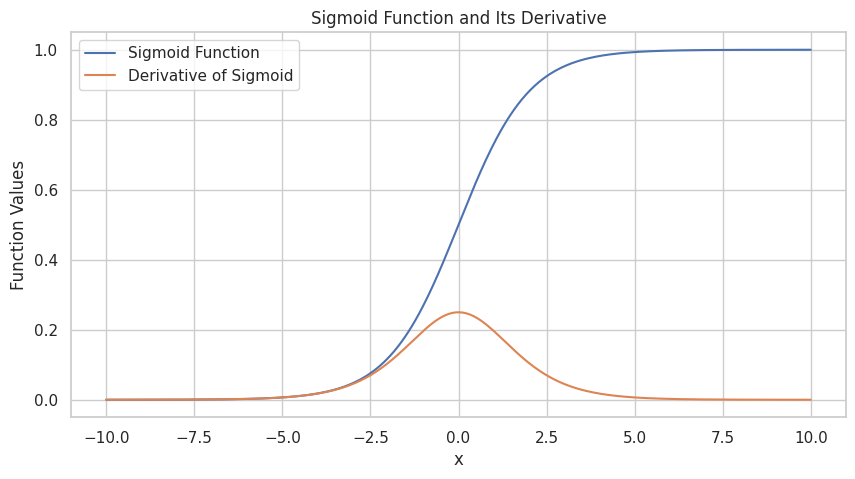

In [44]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a plot with a specific size
plt.figure(figsize=(10, 5))

# Plot the sigmoid function
sns.lineplot(x=x_values, y=y_values, label='Sigmoid Function')

# Plot the derivative of the sigmoid function
sns.lineplot(x=x_values, y=y_derivatives, label='Derivative of Sigmoid')

# Adding the title and labels
plt.title('Sigmoid Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('Function Values')

# Show the plot
plt.show()

## Hyperbolic Tangent



In [46]:
def h_tan(z):
    exp_z = np.exp(z)
    exp_minus_z = np.exp(-z)

    a = exp_z-exp_minus_z
    b = exp_z+exp_minus_z
    return a/b

def diff_h_tan(z):
    g2 = h_tan(z)**2
    return 1-g2

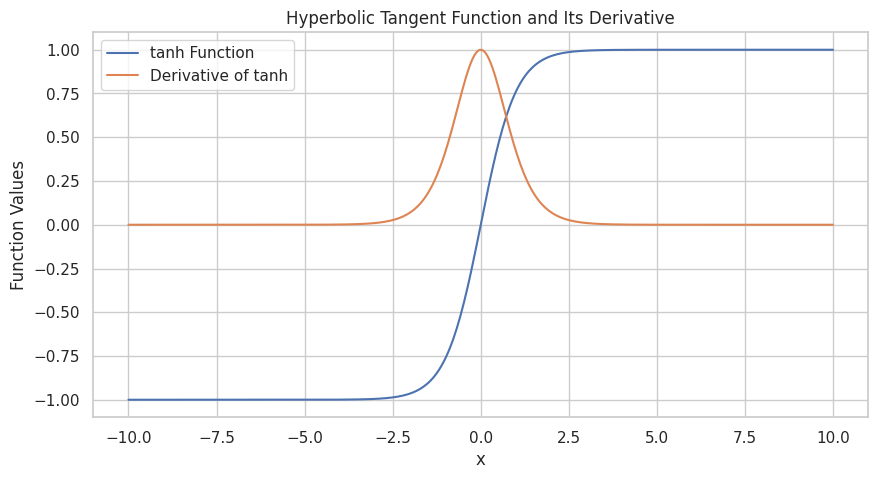

In [49]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a plot with a specific size
plt.figure(figsize=(10, 5))

# Plot the sigmoid function
sns.lineplot(x=x_values, y=h_tan(x_values), label='tanh Function')

# Plot the derivative of the sigmoid function
sns.lineplot(x=x_values, y=diff_h_tan(x_values), label='Derivative of tanh')

# Adding the title and labels
plt.title('Hyperbolic Tangent Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('Function Values')

# Show the plot
plt.show()

# Rectified Linear Unit (Relu)


In [63]:
def ReLU(z):
    return np.maximum(0,z)

def diff_ReLU(z):
    return np.where(z>0,1,0)


### Obs: np.where(condition, [x, y])

where(condition, [x, y])

Return elements chosen from x or y depending on condition.

### Parameters
condition : array_like, bool
    Where True, yield x, otherwise yield y.

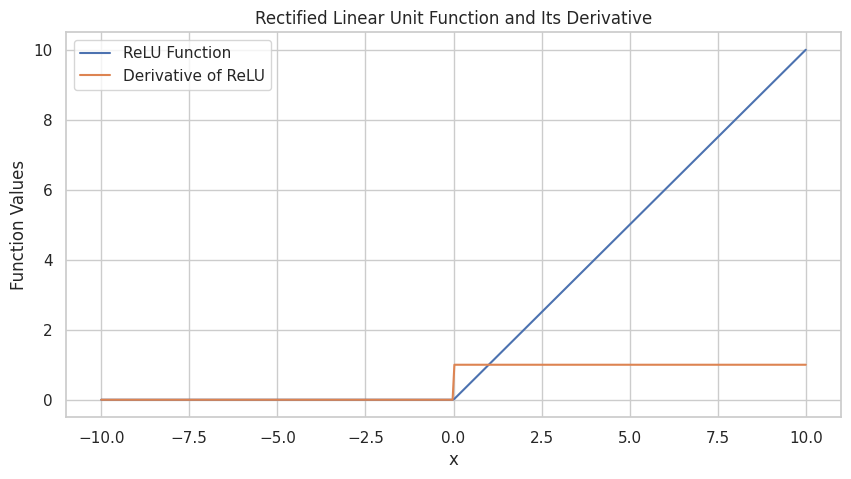

In [66]:
# Create a plot with a specific size
plt.figure(figsize=(10, 5))

# Plot the sigmoid function
sns.lineplot(x=x_values, y=ReLU(x_values), label='ReLU Function')

# Plot the derivative of the sigmoid function
sns.lineplot(x=x_values, y=diff_ReLU(x_values), label='Derivative of ReLU')

# Adding the title and labels
plt.title('Rectified Linear Unit Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('Function Values')

# Show the plot
plt.show()

## Encapsulating All of that Using Classes



In [86]:
class ActivationFunctions:
    """
    A class for computing common neural network activation functions and their derivatives.

    Attributes:
        x (np.ndarray): An array of input values for the activation functions.

    Methods:
        relu():
            Computes the Rectified Linear Unit (ReLU) activation function.
            Returns:
                np.ndarray: ReLU output for each input in self.x.

        diff_relu():
            Computes the derivative of the ReLU activation function.
            Returns:
                np.ndarray: Derivative of ReLU at each input in self.x.

        sigmoid():
            Computes the sigmoid activation function.
            Returns:
                np.ndarray: Sigmoid output for each input in self.x.

        diff_sigmoid():
            Computes the derivative of the sigmoid activation function.
            Returns:
                np.ndarray: Derivative of sigmoid at each input in self.x.

        tanh():
            Computes the hyperbolic tangent (tanh) activation function.
            Returns:
                np.ndarray: Tanh output for each input in self.x.

        diff_tanh():
            Computes the derivative of the tanh activation function.
            Returns:
                np.ndarray: Derivative of tanh at each input in self.x.

        plot(func_name: str):
            Plots the specified activation function alongside its derivative.
            Parameters:
                func_name (str): The name of the activation function to plot. Valid options are 'relu', 'sigmoid', or 'tanh'.
            Raises:
                ValueError: If an unsupported function name is provided.
    """
    def __init__(self, x_values):
        """Initializes the ActivationFunctions class with the specified input values."""
        self.x = x_values

    def relu(self):
        return np.maximum(0, self.x)

    def diff_relu(self):
        return np.where(self.x > 0, 1, 0)

    def sigmoid(self):
        return 1 / (1 + np.exp(-self.x))

    def diff_sigmoid(self):
        sig = self.sigmoid()
        return sig * (1 - sig)

    def tanh(self):
        return np.tanh(self.x)

    def diff_tanh(self):
        return 1 - np.tanh(self.x)**2

    def plot(self, func_name):
        """Plot the specified activation function and its derivative."""
        if func_name == 'relu':
            y = self.relu()
            dy = self.diff_relu()
        elif func_name == 'sigmoid':
            y = self.sigmoid()
            dy = self.diff_sigmoid()
        elif func_name == 'tanh':
            y = self.tanh()
            dy = self.diff_tanh()
        else:
            raise ValueError("Unsupported function. Choose 'relu', 'sigmoid', or 'tanh'.")

        plt.figure(figsize=(10, 5))
        plt.plot(self.x, y, label=f'{func_name.capitalize()} Function', linewidth=2)
        plt.plot(self.x, dy, label=f'{func_name.capitalize()} Derivative', linestyle='--')
        plt.title(f'{func_name.capitalize()} Activation Function and Its Derivative')
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.grid(True)
        plt.legend()
        plt.show()

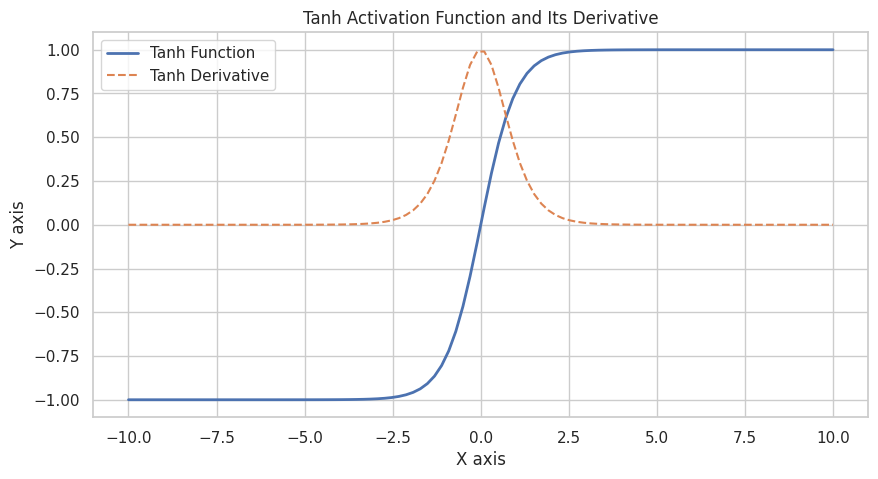

In [87]:
activations = ActivationFunctions(x_values)
activations.plot('tanh')


In [106]:
# Definindo os vetores
W_ex = np.asarray([1, 3, -2])
x_ex = np.asarray([1, 3, 2])

# Calculando o produto escalar
produto_escalar = np.dot(W_ex, x_ex)

print("Produto Escalar:", produto_escalar)


Produto Escalar: 6


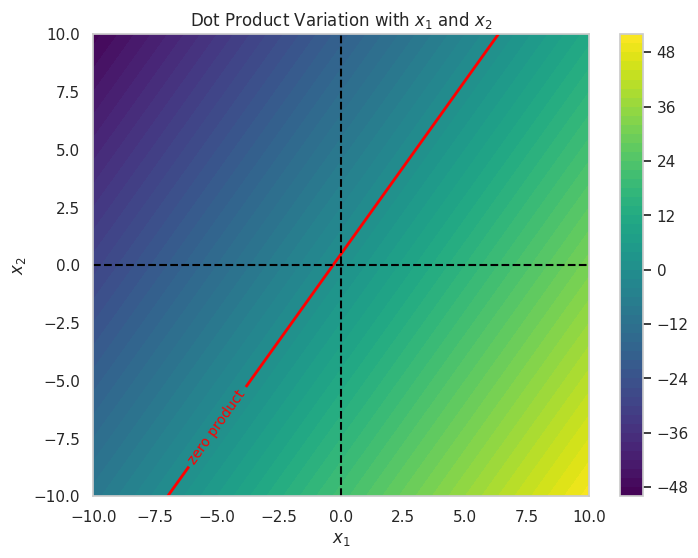

In [128]:
# Defining the constant vector
W_ex = np.asarray([1, 3, -2])

# Setting the limits for x_1 and x_2
x1_values = np.linspace(-10, 10, 400)
x2_values = np.linspace(-10, 10, 400)

# Creating a mesh of points
X1, X2 = np.meshgrid(x1_values, x2_values)

# Calculating the dot product for each combination of x1 and x2
dot_product = W_ex[0] * 1 + W_ex[1] * X1 + W_ex[2] * X2

# Calculating sigmoid
dot_sigmoid = sigmoid(dot_product)

# Plotting the result
plt.figure(figsize=(8, 6))

contour = plt.contourf(X1, X2, dot_product, levels=50, cmap='viridis')
plt.colorbar(contour)

# Add contour where the scalar product is zero
zero_contour = plt.contour(X1, X2, dot_product, levels=[0], colors='red', linewidths=2)
plt.clabel(zero_contour, inline=True, fontsize=10, fmt='zero product')

# Adding a vertical line for x_1 = 0 (y axis)
plt.axvline(0, color='black', linestyle='--', linewidth=1.5, label='$x_1=0$')

# Adding a horizontal line for x_2 = 0 (y axis)
plt.axhline(0, color='black', linestyle='--', linewidth=1.5, label='$x_2=0$')

plt.title('Dot Product Variation with $x_1$ and $x_2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


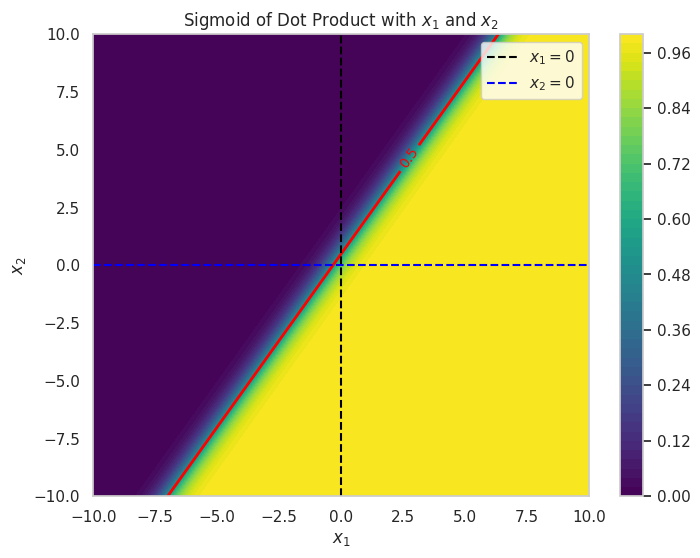

In [133]:
# Plotting the result
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, dot_sigmoid, levels=50, cmap='viridis')
plt.colorbar(contour)

# Adding contour where the sigmoid of the dot product is 0.5 (mid-point)
mid_contour = plt.contour(X1, X2, dot_sigmoid, levels=[0.5], colors='red', linewidths=2)
plt.clabel(mid_contour, inline=True, fontsize=10, fmt='0.5')

# Adding a vertical line for x_1 = 0 (y-axis)
plt.axvline(0, color='black', linestyle='--', linewidth=1.5, label='$x_1=0$')

# Adding a horizontal line for x_2 = 0 (x-axis)
plt.axhline(0, color='blue', linestyle='--', linewidth=1.5, label='$x_2=0$')

plt.title('Sigmoid of Dot Product with $x_1$ and $x_2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()